In [1]:
import numpy as np
import zfit
import matplotlib.pyplot as plt

# create space
obs1 = zfit.Space("x", limits=(0, 10))
obs2 = zfit.Space("x", limits=(0, 10))

# parameters
mu1 = zfit.Parameter("mu1", 5., 1, 10)
sigma1 = zfit.Parameter("sigma1", 1., 0.1, 10)
lambd1 = zfit.Parameter("lambda1", -0.2, -1, -0.01)
frac1 = zfit.Parameter("fraction1", 0.3, 0, 1, step_size=0.001)

mu2 = zfit.Parameter("mu2", 5., step_size=0)
sigma2 = zfit.Parameter("sigma2", 1., step_size=0)
lambd2 = zfit.Parameter("lambda2", -0.2, step_size=0)
frac2 = zfit.Parameter("fraction2", 0.3, step_size=0)

# model building, pdf creation
gauss1 = zfit.pdf.Gauss(mu=mu1, sigma=sigma1, obs=obs1)
exponential1 = zfit.pdf.Exponential(lambd1, obs=obs1)
model1 = zfit.pdf.SumPDF([gauss1, exponential1], fracs=frac1)


gauss2 = zfit.pdf.Gauss(mu=mu2, sigma=sigma2, obs=obs2)
exponential2 = zfit.pdf.Exponential(lambd2, obs=obs2)
model2 = zfit.pdf.SumPDF([gauss2, exponential2], fracs=frac2)







/anaconda3/lib/python3.6/site-packages/zfit/__init__.py:32: UserWarning: zfit has moved from TensorFlow 1.x to 2.x, which has some profound implications behind the scenes of zfit
    and minor ones on the user side. Be sure to read the upgrade guide (can be found in the README at the top)
     to have a seemless transition. If this is currently not doable (upgrading is highly recommended though)
     you can downgrade zfit to <0.4. Feel free to contact us in case of problems in order to fix them ASAP.
  you can downgrade zfit to <0.4. Feel free to contact us in case of problems in order to fix them ASAP.""")
/anaconda3/lib/python3.6/site-packages/zfit/util/execution.py:62: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [4]:
# data
n_sample = 10000

exp_data = exponential2.sample(n=n_sample * (1 - frac2)).numpy()

gauss_data = gauss2.sample(n=n_sample * frac2).numpy()

data = model2.create_sampler(n_sample, limits=obs2)
data.resample()

In [6]:
import random
frac1.set_value(random.random())

# plot the data
data_np = data[:, 0].numpy()
color = 'black'
n_bins = 100

linewidth = 2.5
plot_scaling = n_sample / n_bins * obs1.area()

x = np.linspace(0, 10, 1000)

In [7]:
nll1 = zfit.loss.UnbinnedNLL(model=model1, data=data)

# create a minimizer
minimizer = zfit.minimize.Minuit()

result1 = minimizer.minimize(nll1)

# do the error calculations, here with minos


------------------------------------------------------------------
| FCN = 2.152E+04               |      Ncalls=63 (63 total)      |
| EDM = 1.98E-08 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


In [8]:
param_errors = result1.error()


In [9]:
param_errors

OrderedDict([(<zfit.Parameter 'fraction1' floating=True value=0.3041>,
              -------------------------------------------------
|    fraction1    |            Valid            |
-------------------------------------------------
|      Error      |    -0.010    |     0.010    |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------),
             (<zfit.Parameter 'mu1' floating=True value=5.043>,
              -------------------------------------------------
|       mu1       |            Valid            |
-------------------------------------------------
|      Error      |    -0.032    |     0.032    |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     | 

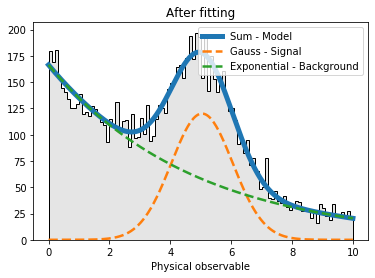

In [10]:
plt.figure()
plt.title("After fitting")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")

y = model1.pdf(x).numpy()  # rerun now after the fitting
y_gauss = (gauss1.pdf(x) * frac1).numpy()
y_exp = (exponential1.pdf(x) * (1 - frac1)).numpy()

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

plt.show()

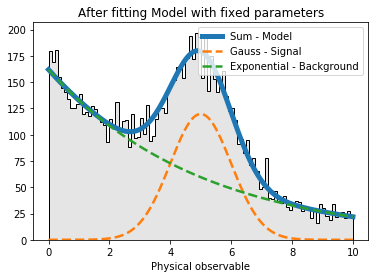

In [11]:
plt.figure()
plt.title("After fitting Model with fixed parameters")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")

y = model2.pdf(x).numpy()  # rerun now after the fitting
y_gauss = (gauss2.pdf(x) * frac2).numpy()
y_exp = (exponential2.pdf(x) * (1 - frac2)).numpy()

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

plt.show()

In [16]:
res = []
minimizer = zfit.minimize.Minuit()
for i in range(0,100):

    data.resample()
    frac1.set_value(random.random())

    # plot the data
    data_np = data[:, 0].numpy()

    nll1 = zfit.loss.UnbinnedNLL(model=model1, data=data)

    result1 = minimizer.minimize(nll1)
    value_stat = list(result1.error().keys())[0]
    error_stat = list(result1.error().values())[0]
    frac_value = float(value_stat.value())
    frac_error = float(error_stat.upper)
    res.append((frac_value - frac2.value())/frac_error)

    

------------------------------------------------------------------
| FCN = 2.147E+04               |      Ncalls=63 (63 total)      |
| EDM = 1.27E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.153E+04               |      Ncalls=62 (62 total)      |
| EDM = 0.000107 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.157E+04               |      Ncalls=65 (65 total)      |
| EDM = 1.35E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.155E+04               |      Ncalls=53 (53 total)      |
| EDM = 0.00019 (Goal: 5E-05)   |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.157E+04               |      Ncalls=65 (65 total)      |
| EDM = 5.54E-08 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.155E+04               |      Ncalls=62 (62 total)      |
| EDM = 1.09E-05 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.16E+04                |      Ncalls=52 (52 total)      |
| EDM = 9.24E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.151E+04               |      Ncalls=63 (63 total)      |
| EDM = 2.85E-08 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.151E+04               |      Ncalls=64 (64 total)      |
| EDM = 3.46E-08 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.157E+04               |      Ncalls=63 (63 total)      |
| EDM = 5.01E-07 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.159E+04               |      Ncalls=65 (65 total)      |
| EDM = 3.63E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.15E+04                |      Ncalls=62 (62 total)      |
| EDM = 1.56E-06 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.154E+04               |      Ncalls=63 (63 total)      |
| EDM = 2.72E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.151E+04               |      Ncalls=67 (67 total)      |
| EDM = 1.31E-05 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.153E+04               |      Ncalls=62 (62 total)      |
| EDM = 3.53E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.154E+04               |      Ncalls=61 (61 total)      |
| EDM = 1.64E-06 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.151E+04               |      Ncalls=64 (64 total)      |
| EDM = 2.46E-06 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.153E+04               |      Ncalls=65 (65 total)      |
| EDM = 1.78E-08 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.16E+04                |      Ncalls=65 (65 total)      |
| EDM = 0.000187 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.152E+04               |      Ncalls=62 (62 total)      |
| EDM = 5.47E-07 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.157E+04               |      Ncalls=66 (66 total)      |
| EDM = 0.000218 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.152E+04               |      Ncalls=66 (66 total)      |
| EDM = 9.99E-09 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.156E+04               |      Ncalls=65 (65 total)      |
| EDM = 0.000266 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.152E+04               |      Ncalls=62 (62 total)      |
| EDM = 0.00122 (Goal: 5E-05)   |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.147E+04               |      Ncalls=64 (64 total)      |
| EDM = 2.52E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.152E+04               |      Ncalls=66 (66 total)      |
| EDM = 2.54E-05 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.154E+04               |      Ncalls=64 (64 total)      |
| EDM = 9.23E-07 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.153E+04               |      Ncalls=63 (63 total)      |
| EDM = 9.62E-07 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.147E+04               |      Ncalls=64 (64 total)      |
| EDM = 1.31E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.154E+04               |      Ncalls=65 (65 total)      |
| EDM = 5.75E-07 (Goal: 5E-05)  |            up = 0.5         

------------------------------------------------------------------
| FCN = 2.152E+04               |      Ncalls=62 (62 total)      |
| EDM = 1.19E-05 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 2.16E+04                |      Ncalls=61 (61 total)      |
| EDM = 4.55E-07 (Goal: 5E-05)  |            up = 0.5         

In [ ]:
plt.figure()
plt.title("f-f1/error distribution")
# plot the data
plt.hist(res, color=color, bins=25, histtype="stepfilled", alpha=0.1)
plt.hist(res, color=color, bins=25, histtype="step")

In [ ]:
import numpy as np
print("Стандартное отклонение:", np.var(res))
print("Среднее значение:", np.mean(res))

In [ ]:
class HistPDF(zfit.pdf.BasePDF):

    def __init__(self, hist_args, hist_bins, obs, name='HistPDF'):
        self.rv_hist = scipy.stats.rv_histogram([hist_args, hist_bins])  # or something, unsure
        super().__init__(obs=obs, name=name)

    def _unnormalized_pdf(self, x):
        x = z.unstack_x(x)
        probs =  z.py_function(func=self.rv_hist.pdf, inp=[x], Tout=tf.float64)
        probs.set_shape(x.shape)
        return probs

In [ ]:
import scipy.stats
import numpy as np
hist = np.histogram(data_np, bins=100)
hist_dist = scipy.stats.rv_histogram(hist)
hist_pdf = HistPDF(hist_dist, obs1)

In [ ]:
import matplotlib.pyplot as plt
X = np.linspace(0, 10.0, 100)
plt.title("PDF from Template")
plt.hist(data_np, density=True, bins=100)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.show()

In [ ]:
import tensorflow as tf
probs =  tf.py_function(func=rv_hist.pdf, inp=hist_dist)

In [ ]:
print(hist_dist)